<a href="https://colab.research.google.com/github/Zayedislam/Network-simulation-with-ns3/blob/master/Convert_color_image_to_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install imageio

In [4]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp


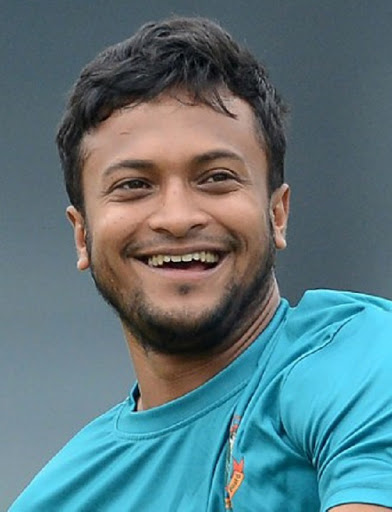

In [6]:
img="/content/drive/MyDrive/sakib.jpg"
dp.Image(img)

In [7]:
source_img = imageio.imread(img)

In [8]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np
def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

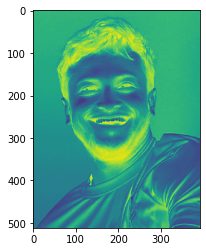

In [9]:

plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)



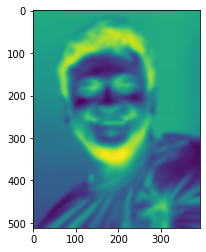

In [10]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [11]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [12]:
target_img= dodging(blurred_img, gryscl_img)

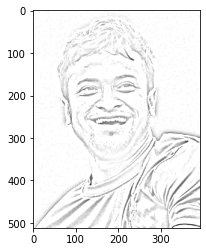

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [14]:
plt.imsave('sakib_sketch.png', target_img, cmap='gray', vmin=0, vmax=255)